In [15]:
import os
import tarfile
from six.moves import urllib

In [16]:
DOWNLOAD_ROOT = 'https://github.com/ageron/handson-ml2/tree/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [17]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

#fetch_housing_data()

In [18]:
import pandas as pd
import numpy as np

In [19]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [20]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

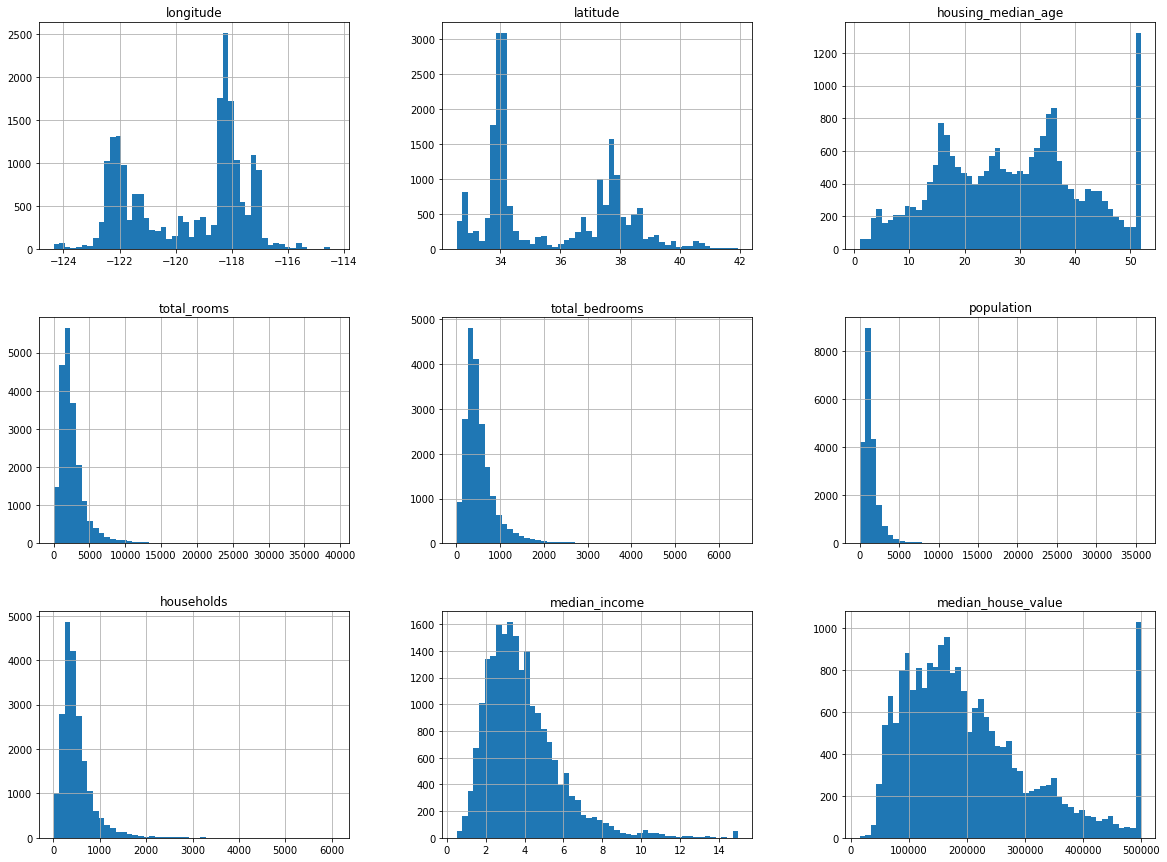

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit

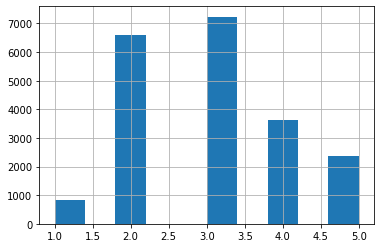

In [25]:
# add income category to limit very high incomes and have for every category data (how to split the dataset)
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5,5.0,inplace=True)
housing['income_cat'].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#drop the category again after splitting the set, so its the original table again
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [26]:
# only use the training set for now
housing = strat_train_set.copy()

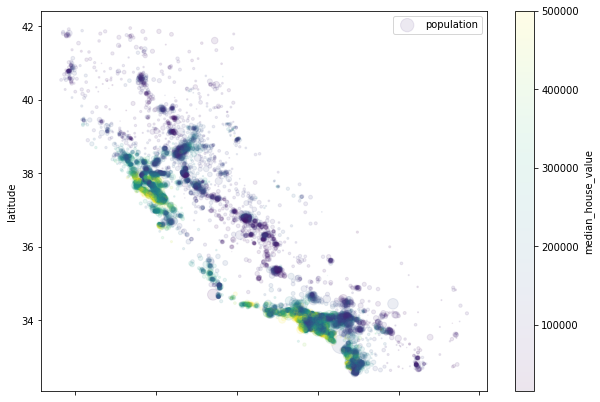

In [27]:
housing.plot(kind='scatter',x='longitude', y='latitude',alpha=0.1,
             s=housing['population']/100, label='population', figsize=(10,7),
             c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [28]:
#looking for corellations
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

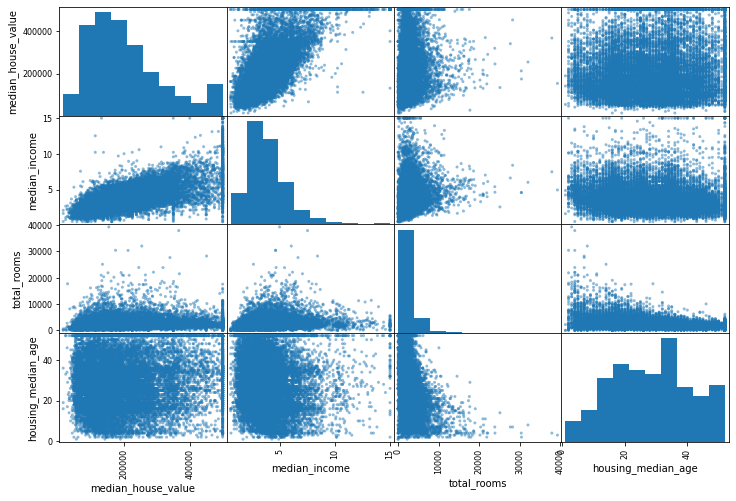

In [29]:
from pandas.plotting import scatter_matrix

#promising attributes
attributes = ['median_house_value','median_income','total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

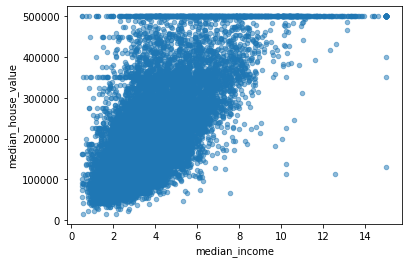

In [30]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.5)

In [31]:
# we want some additional useful quantities
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [32]:
# Preparations of the Data for algorithms

housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
# we can only use numerical values when we want to fill NA's with the imputer
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [35]:
# handling categorical data
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household, population_per_household]
    
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
        

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values
    
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


In [37]:
# have individual pipelines for the data to process them for ML algorithm

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder())
])

In [38]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [40]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [ 85657.90770276 305492.62077889 152056.45476509 186095.72331527
 244550.67491487]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [41]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68627.87390018995


In [50]:
# try more powerful model

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [51]:
# the model might be highly overfitting
# we want to use cross validation (splitting the training sets in multiple 'folds') to have more test and validation sets

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error', cv=10)
tree_rsme_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print('scores:',scores)
    print('mean:', scores.mean())
    print('std:', scores.std())
    
display_scores(tree_rsme_scores)
# decision tree scoring is worse than linreg scroing

scores: [71514.9611257  71296.9135789  69180.26368402 72693.99359279
 70822.87412362 79250.1619481  71198.66234001 73679.9279607
 67149.0348819  71821.86290366]
mean: 71860.86561393729
std: 2999.1151770622237


In [54]:
# cross validation scoring of linreg
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error', cv=10)
lin_rsme_scores = np.sqrt(-scores)
display_scores(lin_rsme_scores)

scores: [71762.76444742 64114.99211639 67771.16797173 68635.19072527
 66846.14349352 72528.03735467 73997.0802352  68802.33608032
 66443.2884515  70139.80025302]
mean: 69104.08011290358
std: 2880.328150821278


In [58]:
# randomforest = many decisiontrees on random subsets, then averaging
# when you build a model onto another model it is called Ensemble learning

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rsme = np.sqrt(forest_mse)
forest_rsme


18723.81873774858

In [61]:
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error', cv=2)
forest_rsme_scores = np.sqrt(-scores)
display_scores(forest_rsme_scores)

scores: [52291.12963207 53076.67850298]
mean: 52683.904067524876
std: 392.7744354597453


In [ ]:
# you should always test many different ML algorithms before you start tweaking hyperparameters!
# save your models with pythons 'pickle' or 'joblib' from sklearn

from sklearn.externals import joblib
joblib.dump(forest_reg, 'forest_reg.pkl')

In [82]:
# fine tuning the model

from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30],'max_features':[2,3,4,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
             ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid,cv=6, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared,housing_labels)


GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [83]:
# get best estimator parameters
grid_search.best_params_


{'max_features': 8, 'n_estimators': 30}

In [84]:
# get best estimator directly
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64773.61131785136 {'max_features': 2, 'n_estimators': 3}
55019.648072675394 {'max_features': 2, 'n_estimators': 10}
52729.0848638895 {'max_features': 2, 'n_estimators': 30}
62079.51958914141 {'max_features': 3, 'n_estimators': 3}
53510.41513887192 {'max_features': 3, 'n_estimators': 10}
51370.72086002842 {'max_features': 3, 'n_estimators': 30}
60630.18993744059 {'max_features': 4, 'n_estimators': 3}
52845.34792567117 {'max_features': 4, 'n_estimators': 10}
50806.29404608319 {'max_features': 4, 'n_estimators': 30}
57995.92685603943 {'max_features': 8, 'n_estimators': 3}
52082.93927926351 {'max_features': 8, 'n_estimators': 10}
50056.37714986947 {'max_features': 8, 'n_estimators': 30}
63515.06947106663 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54149.805563491565 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60593.92620853506 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52472.90028710218 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [86]:
# when the seach space for hyperparameters is large it can be better to use a 'RandomizedSearchCV' to not test all combinations, only randomized


In [91]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.21594232e-02, 6.28123999e-02, 4.06252508e-02, 1.48290547e-02,
       1.45098844e-02, 1.49689104e-02, 1.37757498e-02, 3.06828803e-01,
       6.72551999e-02, 1.14605413e-01, 8.56085332e-02, 8.02383600e-03,
       1.79670866e-01, 5.00011645e-05, 1.57475686e-03, 2.70191737e-03])

In [101]:
extra_attribs = ['rooms_per_household', 'pop_per_household', 'bedrooms_per_room']
cat_encoder = cat_pipeline.named_steps['cat_encoder']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes),reverse=True)

[(0.3068288033486193, 'median_income'),
 (0.17967086636655125, 'INLAND'),
 (0.11460541266773912, 'pop_per_household'),
 (0.08560853318900549, 'bedrooms_per_room'),
 (0.07215942320053866, 'longitude'),
 (0.0672551999371544, 'rooms_per_household'),
 (0.0628123998560828, 'latitude'),
 (0.04062525078283097, 'housing_median_age'),
 (0.014968910380959235, 'population'),
 (0.014829054671166563, 'total_rooms'),
 (0.014509884404975776, 'total_bedrooms'),
 (0.013775749806274423, 'households'),
 (0.00802383599518157, '<1H OCEAN'),
 (0.002701917371326457, 'NEAR OCEAN'),
 (0.0015747568570744417, 'NEAR BAY'),
 (5.000116451964204e-05, 'ISLAND')]

In [103]:
# evaluate on TEST set

final_model = grid_search.best_estimator_

x_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rsme = np.sqrt(final_mse)
final_rsme

47875.1615490272

In [115]:
# EXERCISES

# Support Vector Machine
from sklearn.svm  import SVR

SVM_reg = SVR()
SVM_reg.fit(housing_prepared,housing_labels)

SVM_predictions = SVM_reg.predict(housing_prepared)

SVM_mse = mean_squared_error(housing_labels,SVM_predictions)
SVM_rsme = np.sqrt(SVM_mse)
SVM_rsme

118578.69234925653

In [122]:
param_grid = [{'kernel':['linear','rbf'], 'C':[1000,10000], 'gamma':[1000,10000]}]
SVM_reg = SVR()
grid_search = GridSearchCV(SVM_reg, param_grid,cv=3, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared,housing_labels)


GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [1000, 10000], 'gamma': [1000, 10000],
                          'kernel': ['linear', 'rbf']}],
             scoring='neg_mean_squared_error')

In [123]:
SVR_results = grid_search.cv_results_

for mean, params in zip(SVR_results['mean_test_score'],SVR_results['params']):
    print(mean,params)

-5133678646.359494 {'C': 1000, 'gamma': 1000, 'kernel': 'linear'}
-14144182380.826712 {'C': 1000, 'gamma': 1000, 'kernel': 'rbf'}
-5133678646.359494 {'C': 1000, 'gamma': 10000, 'kernel': 'linear'}
-14144182391.0558 {'C': 1000, 'gamma': 10000, 'kernel': 'rbf'}
-5570019519.920437 {'C': 10000, 'gamma': 1000, 'kernel': 'linear'}
-14155929952.026588 {'C': 10000, 'gamma': 1000, 'kernel': 'rbf'}
-5570019519.920437 {'C': 10000, 'gamma': 10000, 'kernel': 'linear'}
-14155930052.625479 {'C': 10000, 'gamma': 10000, 'kernel': 'rbf'}
